In [1]:

# Dataset de 23.6 MB
import gdown
import os

file_id = '1yY7QtyB3UP8ToKZ0CUDFrDXCZRmdJnll'
dataset_url = f'https://drive.google.com/uc?id={file_id}'
dataset_path = 'data/Loan_default.csv'

os.makedirs(os.path.dirname(dataset_path), exist_ok=True)

if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    gdown.download(dataset_url, dataset_path, quiet=False)
    print("Dataset downloaded and saved to", dataset_path)
else:
    print("Dataset already exists")


Dataset already exists


# 1. Listado de variables y selección

1- **LoanID** es un identificador único del préstamo y no se utilizará en el análisis (es sólo un identificador, no aporta información para predecir un incumplimiento del préstamo).

2- **Age** representa la edad de la persona que quiere obtener el préstamo, en años y se utilizará como variable de entrada. Podría influir en la probabilidad de incumplimiento (menor edad, más chances de que ante un incumplimiento se logre cobrar igual el préstamo y mayor edad, más chances de que la persona se transforme en moroso incobrable).

3- **Income** es el ingreso anual del de la persona que quiere obtener el préstamo y se utilizará como variable de entrada, porque es un factor importante para evaluar la capacidad de pago.

4- **LoanAmount** monto total del préstamo y se utilizará como variable de entrada. Es una variable muy importante en el análisis de predicción de incumplimiento (refleja la cantidad de dinero en la cual la persona se endeuda).

5- **CreditScore** es el puntaje de crédito de la persona y se utilizará como variable de entrada porque es un indicador clave del comportamiento financiero pasado y de la probabilidad de incumplimiento.

6- **MonthsEmployed** indica los meses que la persona ha estado empleado y se utilizará como variable de entrada, ya que la estabilidad laboral puede ser un factor determinante en la capacidad de pago del préstamo y también la capacidad de ahorro.

7- **NumCreditLines** es el número de líneas de crédito abiertas y se utilizará como variable de entrada porque indica la experiencia y el manejo del crédito por parte de la persona, por otra parte, también ayuda a saber el nivel de endeudamiento actual y si podrá ser capaz de afrontar todas las deudas.

8- **InterestRate** es la tasa de interés del préstamo y se utilizará como variable de entrada, ya que una tasa alta podría aumentar el riesgo de incumplimiento y también influye sobre el capital total a devolver.

9- **LoanTerm** es la duración del préstamo en meses y se utilizará como variable de entrada, ya que un plazo más largo puede reducir el monto de los pagos mensuales, lo cual facilita el cumplimiento de las cuotas del préstamo (menor monto). Sin embargo, también puede aumentar el costo total del préstamo debido a los intereses acumulados.

10- **DTIRatio** es la relación deuda-ingreso de la persona y se utilizará como variable de entrada, ya que es un indicador directo de la carga de deuda respecto a sus ingresos.

11- **Education** describe el nivel educativo de la persona y se utilizará como variable de entrada, ya que puede influir en las oportunidades de empleo y la estabilidad financiera.

12- **EmploymentType** indica el tipo de empleo de la persona, como a tiempo completo o parcial, y se utilizará como variable de entrada porque puede afectar la estabilidad del ingreso de la persona.

13- **MaritalStatus** es el estado civil de la persona y se utilizará como variable de entrada, ya que puede influir en la situación financiera y las responsabilidades económicas.

14- **HasMortgage** señala si la persona tiene una hipoteca y se utilizará como variable de entrada, porque tener una hipoteca (que es una deuda existente), puede afectar la capacidad de asumir más deuda.

15- **HasDependents** indica si la persona tiene personas a cargo y se utilizará como variable de entrada, ya que tener otras personas a cargo puede aumentar las obligaciones financieras.

16- **LoanPurpose** describe el propósito del préstamo y se utilizará como variable de entrada porque podría influir en el riesgo asociado al mismo.

17- **HasCoSigner** muestra si el préstamo tiene un garante y se utilizará como variable de entrada. Un garante puede reducir el riesgo de incumplimiento al compartir la responsabilidad del préstamo.

18- **Default** indica si la persona incumplió el préstamo y se utilizará como variable de salida. Es la variable objetivo que se busca predecir, con posibles valores de 0 (no incumplido) y 1 (incumplido).

# 2. Análisis detallado de un conjunto de variables

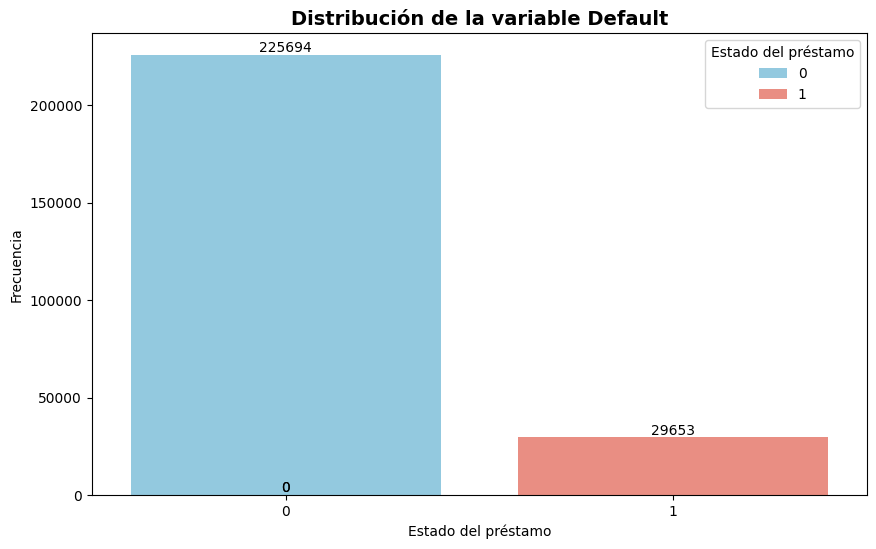

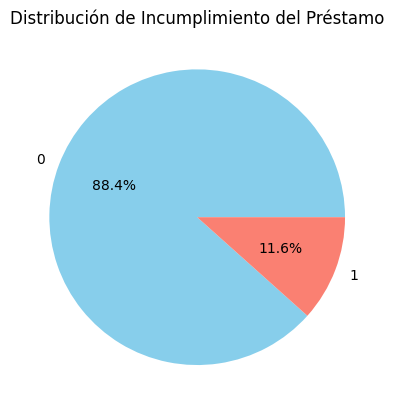

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(dataset_path)
default_counts = df['Default'].value_counts()

data = pd.DataFrame({
    'Estado del préstamo': default_counts.index,
    'Frecuencia': default_counts.values
})

color_palette = {0: 'skyblue', 1: 'salmon'}
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Estado del préstamo', y='Frecuencia', data=data, palette=color_palette, hue='Estado del préstamo', errorbar=None)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Distribución de la variable Default', fontsize=14, weight='bold')
plt.show()

# Gráfico de pastel
default_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribución de Incumplimiento del Préstamo')
plt.ylabel('')
plt.show()

# Distribucion variables de entrada
**Age:** 
Transformacion: Si, normalizar.

Age
18    4884
19    4963
20    4861
21    4889
22    4970
23    4740
24    4869
25    4840
26    4891
27    4945
28    4906
29    4865
30    4954
31    4908
32    4969
33    5022
34    4987
35    4961
36    4906
37    4856
38    4955
39    4973
40    5056
41    4815
42    4803
43    4965
44    4906
45    4985
46    4887
47    4931
48    4810
49    4952
50    4949
51    4876
52    4748
53    5010
54    4921
55    5064
56    4902
57    4925
58    4883
59    4871
60    4772
61    4982
62    4999
63    4862
64    4840
65    5027
66    4841
67    4876
68    4958
69    4817
Name: count, dtype: int64


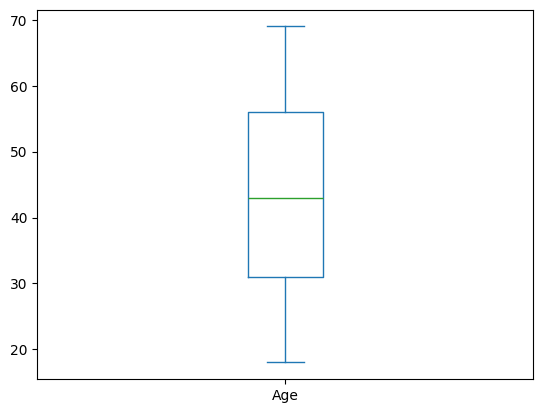

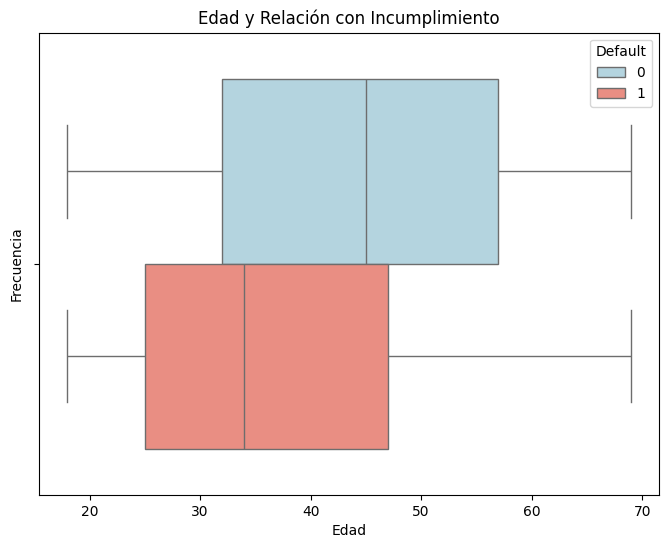

In [33]:
# Distribución de 'Age'
age = df['Age'].value_counts()
print(age.sort_index())

# Boxplot de 'Age'
df['Age'].plot.box()

# Boxplot de 'Age' vs 'Default'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Edad y Relación con Incumplimiento')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Income
15000     3
15001     2
15002     2
15003     1
15004     2
         ..
149994    4
149995    1
149996    3
149997    2
149999    2
Name: count, Length: 114620, dtype: int64


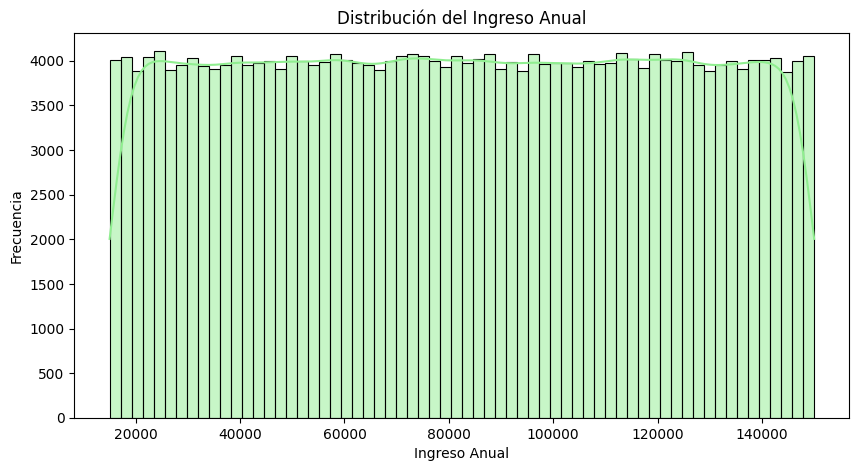

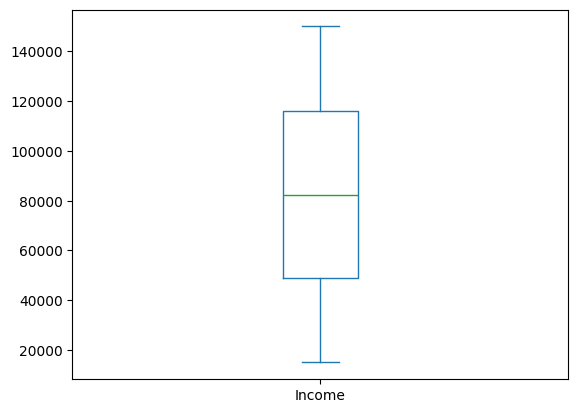

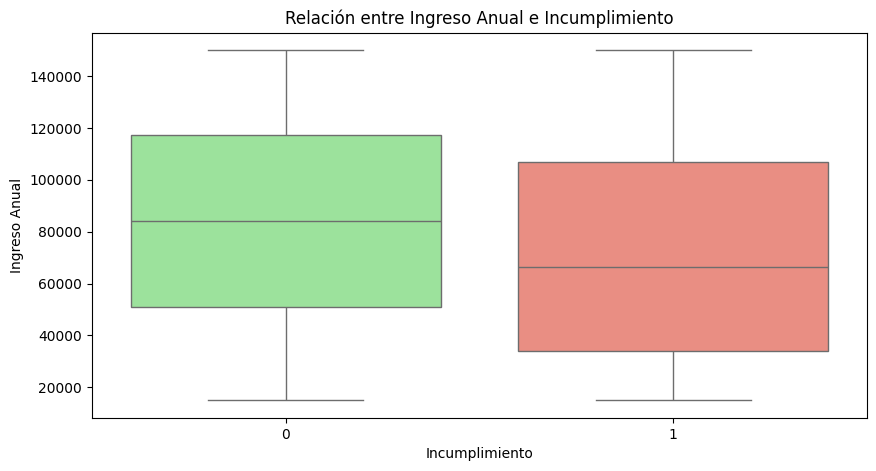

In [38]:
# Income (Ingreso Anual)
Income = df['Income'].value_counts()
print(Income.sort_index())

# Histograma de la variable 'Income'
plt.figure(figsize=(10, 5))
sns.histplot(df['Income'], kde=True, color='lightgreen')
plt.title('Distribución del Ingreso Anual')
plt.xlabel('Ingreso Anual')
plt.ylabel('Frecuencia')
plt.show()
# Boxplot de la variable 'Income'
df['Income'].plot.box()
# Boxplot de 'Income' vs 'Default'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Default', y='Income', hue='Default', data=df, palette=['lightgreen', 'salmon'], legend=False)
plt.title('Relación entre Ingreso Anual e Incumplimiento')
plt.xlabel('Incumplimiento')
plt.ylabel('Ingreso Anual')
plt.show()


CreditScore
300    484
301    460
302    451
303    489
304    456
      ... 
845    438
846    437
847    450
848    463
849    496
Name: count, Length: 550, dtype: int64


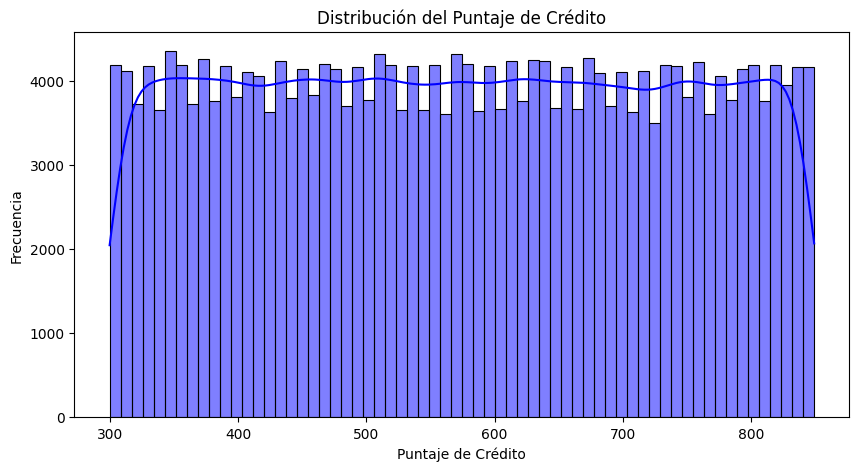

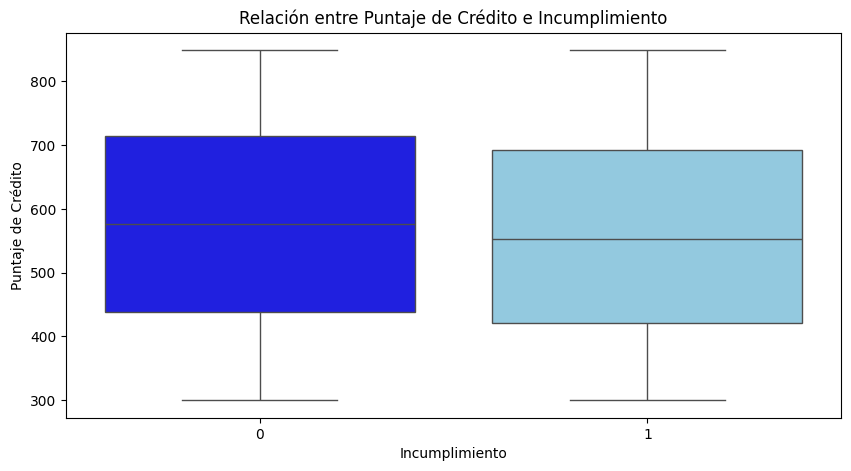

In [39]:
# CreditScore (Puntaje de Crédito)
CreditScore = df['CreditScore'].value_counts()
print(CreditScore.sort_index())

# Histograma de la variable 'CreditScore'
plt.figure(figsize=(10, 5))
sns.histplot(df['CreditScore'], kde=True, color='blue')
plt.title('Distribución del Puntaje de Crédito')
plt.xlabel('Puntaje de Crédito')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de 'CreditScore' vs 'Default'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Default', y='CreditScore', hue='Default', data=df, palette=['blue', 'skyblue'], legend=False)
plt.title('Relación entre Puntaje de Crédito e Incumplimiento')
plt.xlabel('Incumplimiento')
plt.ylabel('Puntaje de Crédito')
plt.show()


LoanAmount
5000      1
5001      1
5005      1
5006      1
5009      2
         ..
249993    2
249996    1
249997    1
249998    1
249999    1
Name: count, Length: 158729, dtype: int64


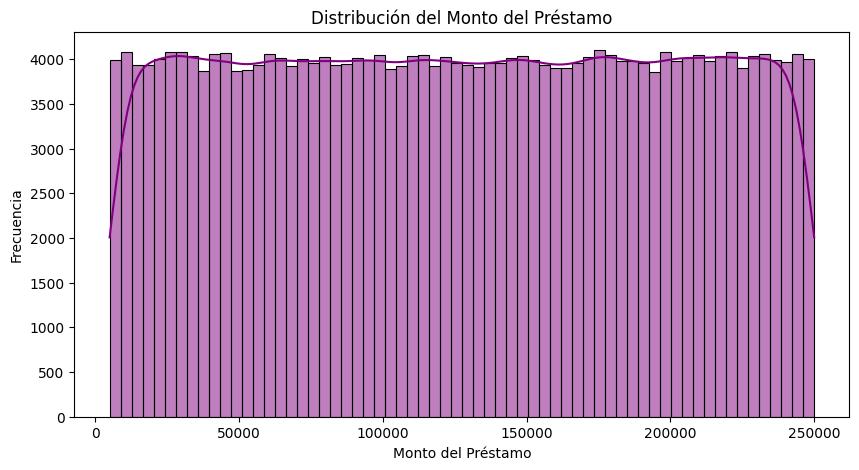

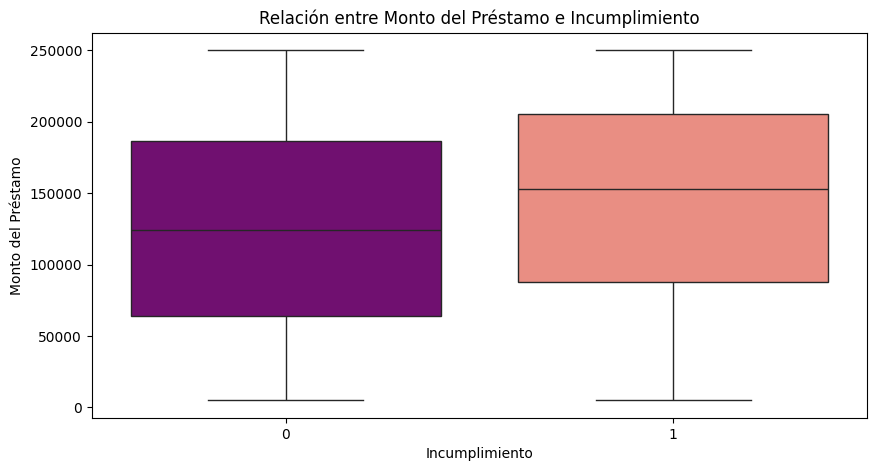

In [40]:
# LoanAmount (Monto del Préstamo)
LoanAmount = df['LoanAmount'].value_counts()
print(LoanAmount.sort_index())

# Histograma de la variable 'LoanAmount'
plt.figure(figsize=(10, 5))
sns.histplot(df['LoanAmount'], kde=True, color='purple')
plt.title('Distribución del Monto del Préstamo')
plt.xlabel('Monto del Préstamo')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de 'LoanAmount' vs 'Default'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Default', y='LoanAmount', hue='Default', data=df, palette=['purple', 'salmon'], legend=False)
plt.title('Relación entre Monto del Préstamo e Incumplimiento')
plt.xlabel('Incumplimiento')
plt.ylabel('Monto del Préstamo')
plt.show()


DTIRatio
0.10    1611
0.11    3051
0.12    3224
0.13    3285
0.14    3228
        ... 
0.86    3274
0.87    3152
0.88    3168
0.89    3134
0.90    1605
Name: count, Length: 81, dtype: int64


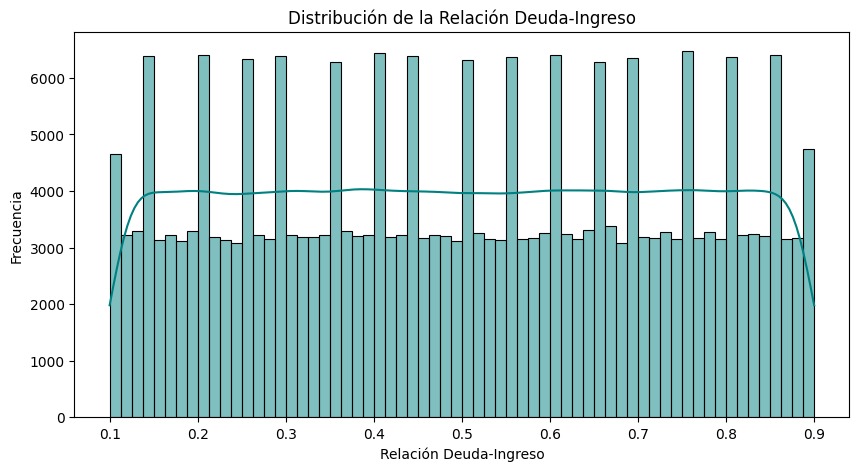

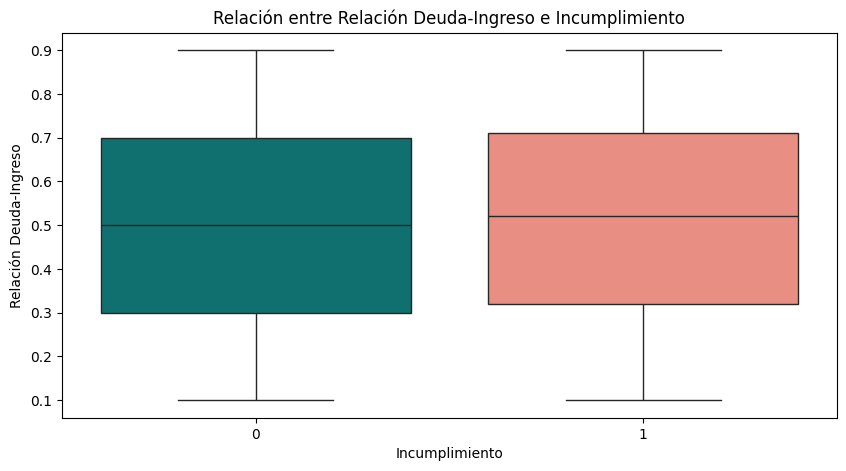

In [41]:
# DTIRatio (Relación Deuda-Ingreso)
DTIRatio = df['DTIRatio'].value_counts()
print(DTIRatio.sort_index())

# Histograma de la variable 'DTIRatio'
plt.figure(figsize=(10, 5))
sns.histplot(df['DTIRatio'], kde=True, color='teal')
plt.title('Distribución de la Relación Deuda-Ingreso')
plt.xlabel('Relación Deuda-Ingreso')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de 'DTIRatio' vs 'Default'
plt.figure(figsize=(10, 5))
sns.boxplot(x='Default', y='DTIRatio', hue='Default', data=df, palette=['teal', 'salmon'], legend=False)
plt.title('Relación entre Relación Deuda-Ingreso e Incumplimiento')
plt.xlabel('Incumplimiento')
plt.ylabel('Relación Deuda-Ingreso')
plt.show()

EmploymentType
Full-time        63656
Part-time        64161
Self-employed    63706
Unemployed       63824
Name: count, dtype: int64
EmploymentType
Full-time        63656
Part-time        64161
Self-employed    63706
Unemployed       63824
Name: count, dtype: int64


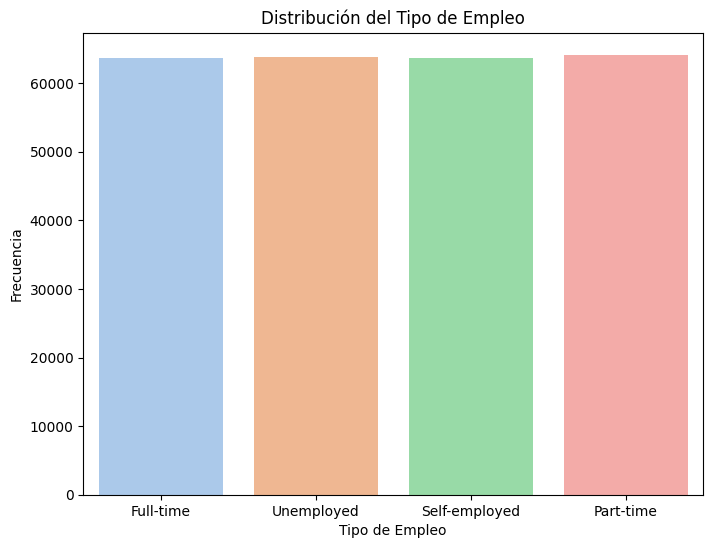

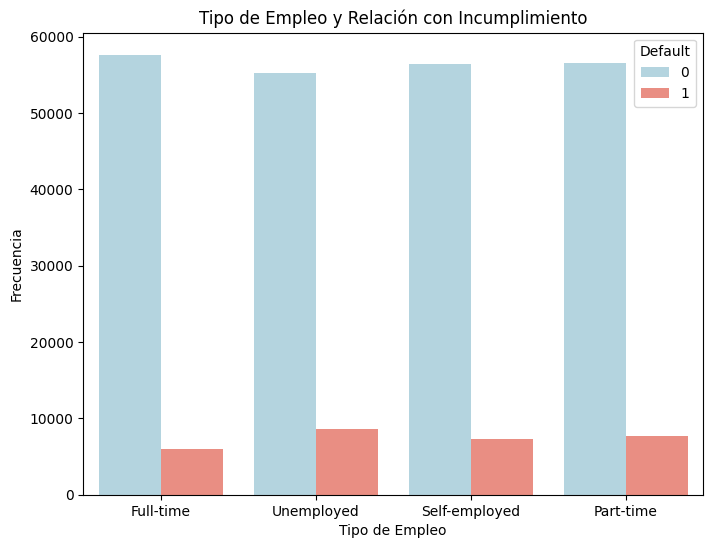

In [42]:
# EmploymentType (Tipo de Empleo)
EmploymentType = df['EmploymentType'].value_counts()
print(EmploymentType.sort_index())

# Frecuencia de cada tipo de empleo
employment_counts = df['EmploymentType'].value_counts()
print(employment_counts.sort_index())

# Gráfico de barras de 'EmploymentType'
plt.figure(figsize=(8, 6))
sns.countplot(x='EmploymentType', data=df, hue='EmploymentType', palette='pastel', legend=False)
plt.title('Distribución del Tipo de Empleo')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para 'EmploymentType' vs 'Default'
plt.figure(figsize=(8, 6))
sns.countplot(x='EmploymentType', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Tipo de Empleo y Relación con Incumplimiento')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Frecuencia')
plt.show()

HasDependents
No     49.973174
Yes    50.026826
Name: proportion, dtype: float64


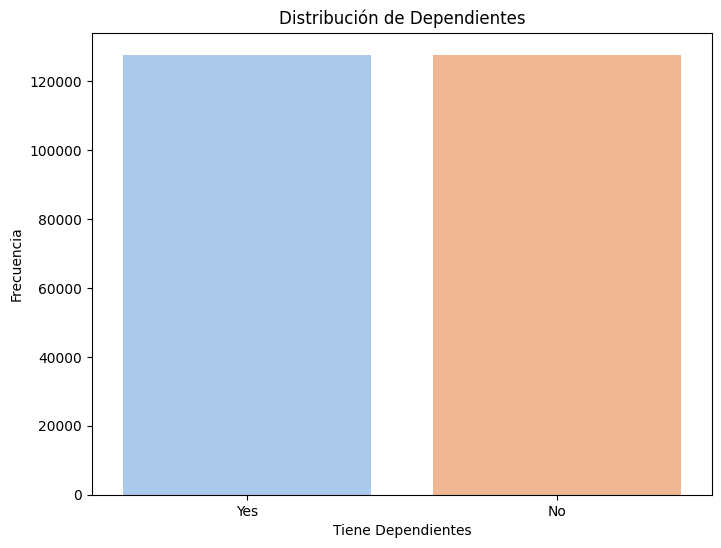

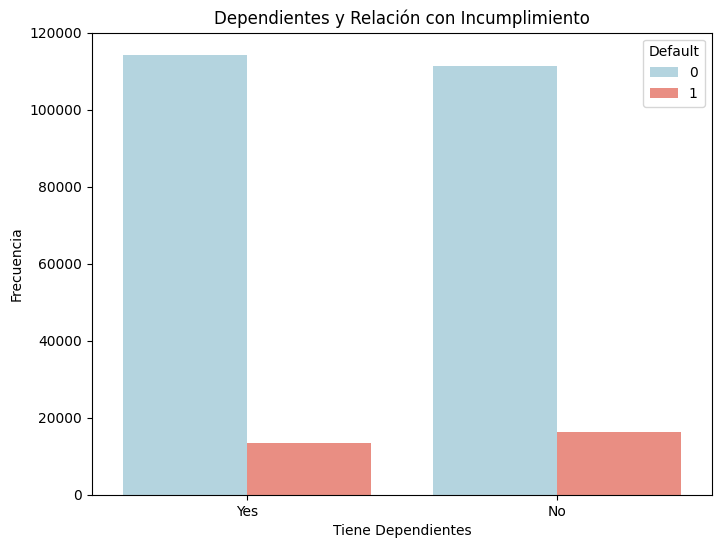

In [43]:
# HasDependents (Tiene Dependientes)

# Distribución de 'HasDependents'
dependents_dist = df['HasDependents'].value_counts(normalize=True) * 100
print(dependents_dist.sort_index())

# Gráfico de barras de 'HasDependents'
plt.figure(figsize=(8, 6))
sns.countplot(x='HasDependents', data=df, hue='HasDependents', palette='pastel', legend=False)
plt.title('Distribución de Dependientes')
plt.xlabel('Tiene Dependientes')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para 'HasDependents' vs 'Default'
plt.figure(figsize=(8, 6))
sns.countplot(x='HasDependents', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Dependientes y Relación con Incumplimiento')
plt.xlabel('Tiene Dependientes')
plt.ylabel('Frecuencia')
plt.show()

LoanPurpose (Propósito del Préstamo)

LoanPurpose
Auto         50844
Business     51298
Education    51005
Home         51286
Other        50914
Name: count, dtype: int64


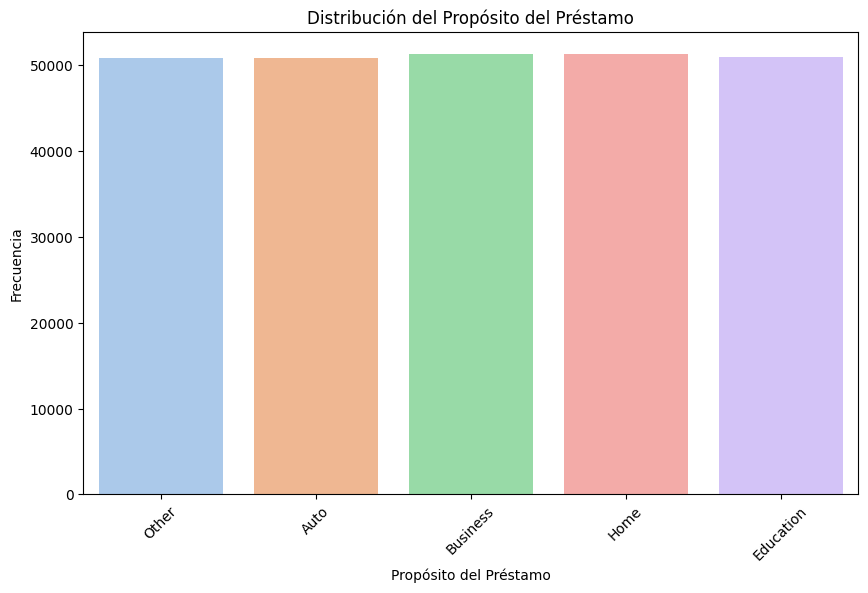

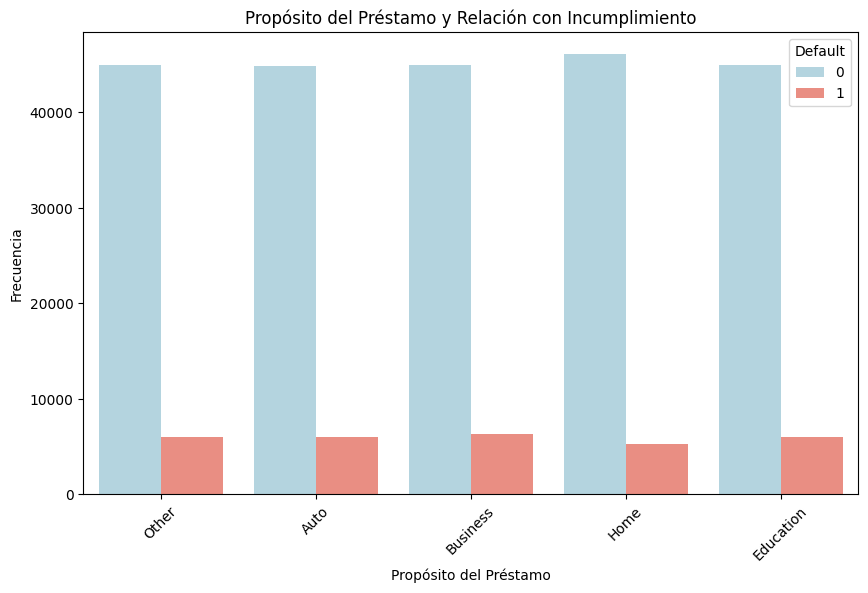

In [44]:
# Frecuencia de cada propósito del préstamo
purpose_counts = df['LoanPurpose'].value_counts()
print(purpose_counts.sort_index())

# Gráfico de barras de 'LoanPurpose'
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanPurpose', data=df, hue='LoanPurpose', palette='pastel', legend=False)
plt.title('Distribución del Propósito del Préstamo')
plt.xlabel('Propósito del Préstamo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para 'LoanPurpose' vs 'Default'
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanPurpose', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Propósito del Préstamo y Relación con Incumplimiento')
plt.xlabel('Propósito del Préstamo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

MaritalStatus (Estado Civil)

MaritalStatus
Divorced    85033
Married     85302
Single      85012
Name: count, dtype: int64


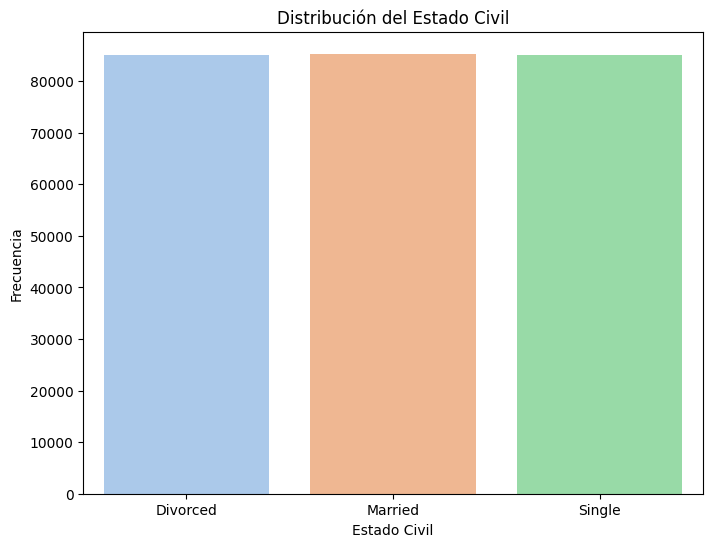

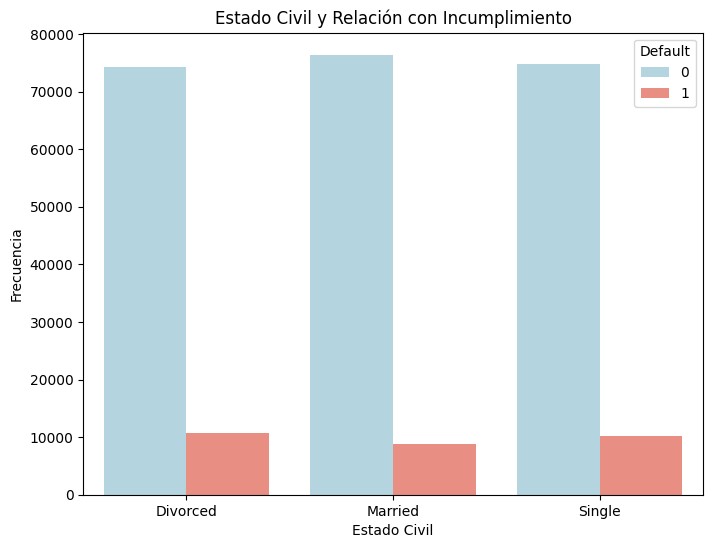

In [45]:
# Frecuencia de cada estado civil
marital_status_counts = df['MaritalStatus'].value_counts()
print(marital_status_counts.sort_index())

# Gráfico de barras de 'MaritalStatus'
plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalStatus', data=df, hue='MaritalStatus', palette='pastel', legend=False)
plt.title('Distribución del Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para 'MaritalStatus' vs 'Default'
plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalStatus', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Estado Civil y Relación con Incumplimiento')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

MonthsEmployed
0      2122
1      2105
2      2151
3      2167
4      2121
       ... 
115    2084
116    2130
117    2084
118    2196
119    2091
Name: count, Length: 120, dtype: int64


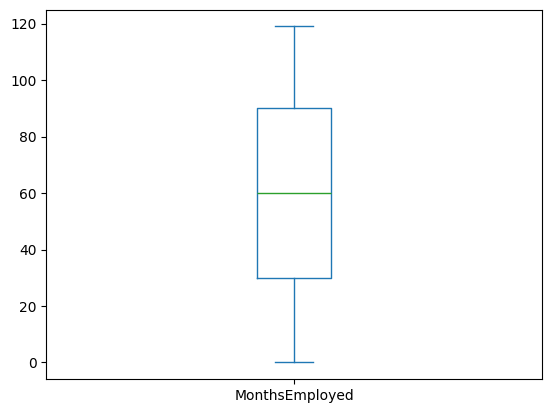

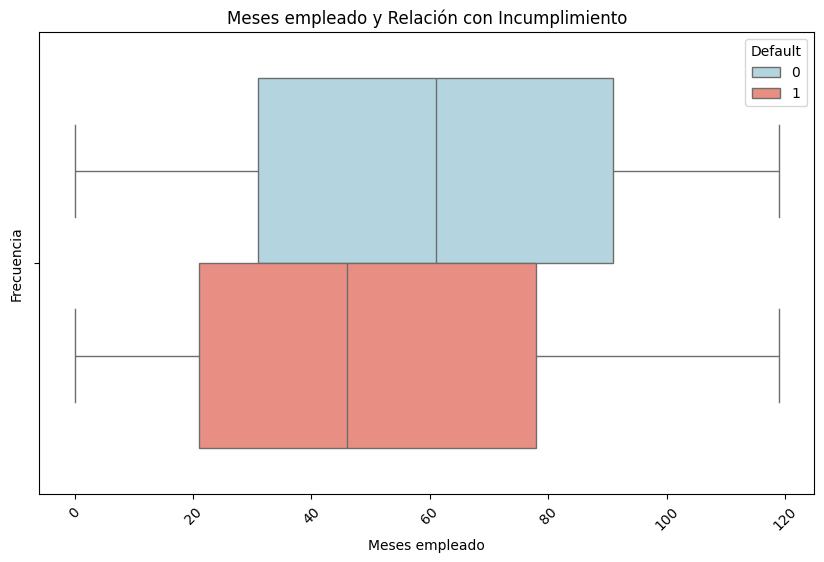

In [32]:
# Meses que la persona ha estado empleado 
months_employed = df['MonthsEmployed'].value_counts()
print(months_employed.sort_index())

# # Boxplot de 'MonthsEmployed'
df['MonthsEmployed'].plot.box()

# Gráfico de barras para 'MonthsEmployed' vs 'Default'
plt.figure(figsize=(10, 6))
sns.boxplot(x='MonthsEmployed', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Meses empleado y Relación con Incumplimiento')
plt.xlabel('Meses empleado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

NumCreditLines
1    63554
2    64130
3    63834
4    63829
Name: count, dtype: int64


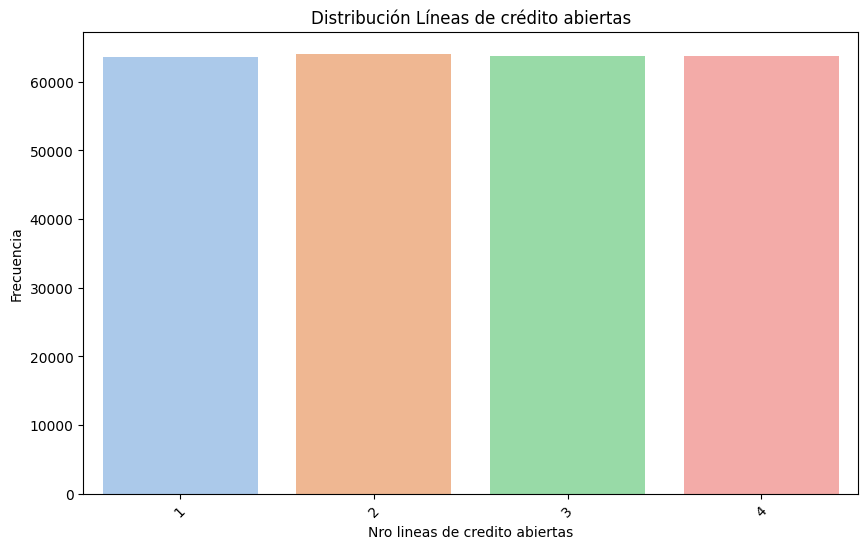

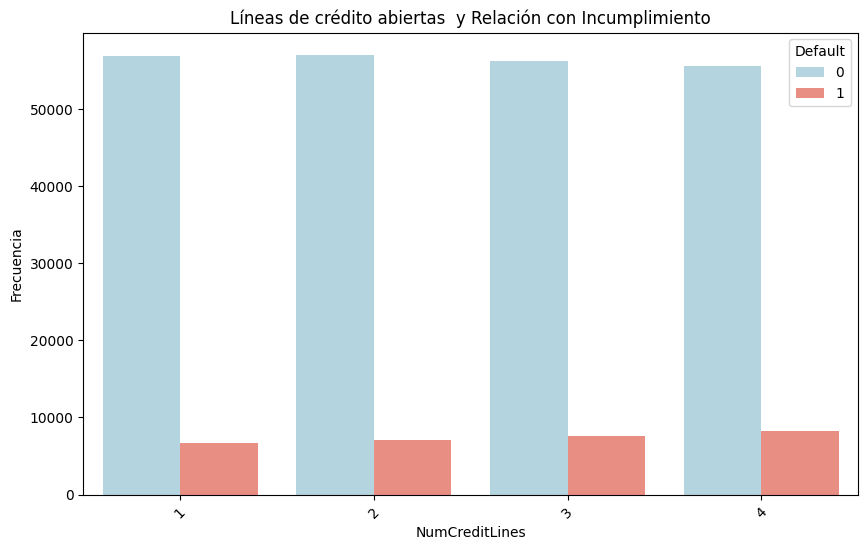

In [46]:
# Líneas de crédito abiertas 
num_CreditLines = df['NumCreditLines'].value_counts()
print(num_CreditLines.sort_index())

# Gráfico de barras de 'NumCreditLines'
plt.figure(figsize=(10, 6))
sns.countplot(x='NumCreditLines', data=df, hue='NumCreditLines', palette='pastel', legend=False)
plt.title('Distribución Líneas de crédito abiertas')
plt.xlabel('Nro lineas de credito abiertas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para 'NumCreditLines' vs 'Default'
plt.figure(figsize=(10, 6))
sns.countplot(x='NumCreditLines', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Líneas de crédito abiertas  y Relación con Incumplimiento')
plt.xlabel('NumCreditLines')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

InterestRate
2.00      44
2.01     110
2.02     108
2.03     104
2.04     109
        ... 
24.96    126
24.97    118
24.98    113
24.99     96
25.00     53
Name: count, Length: 2301, dtype: int64


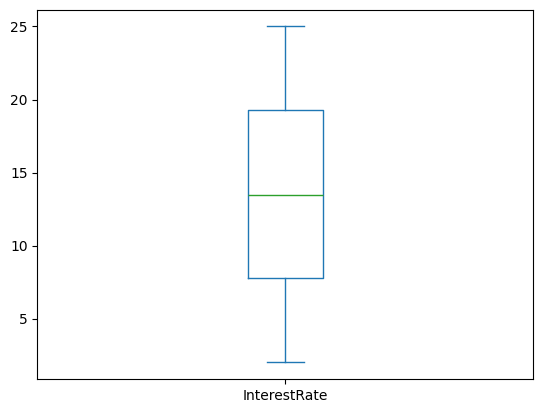

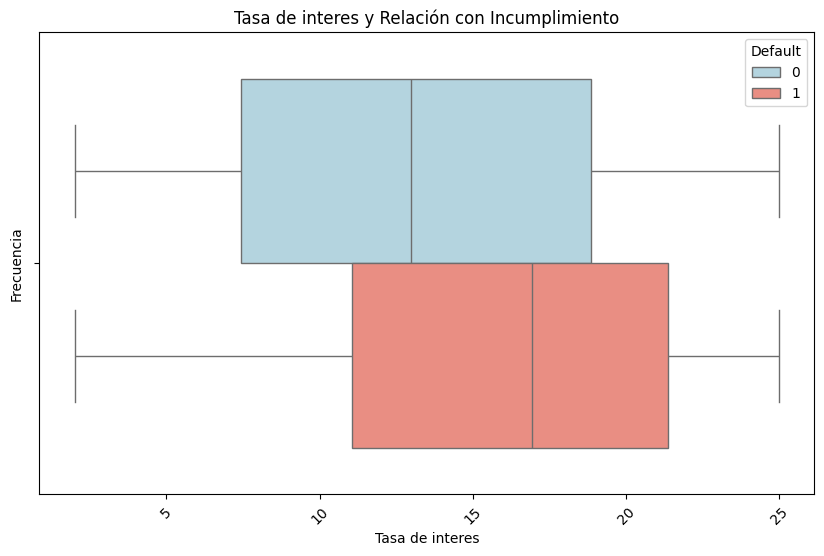

In [47]:
# Tasa de interés del préstamo 
interest_Rate = df['InterestRate'].value_counts()
print(interest_Rate.sort_index())

# Boxplot de 'InterestRate'
df['InterestRate'].plot.box()

# Gráfico de barras para 'InterestRate' vs 'Default'
plt.figure(figsize=(10, 6))
sns.boxplot(x='InterestRate', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Tasa de interes y Relación con Incumplimiento')
plt.xlabel('Tasa de interes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

LoanTerm
12    50957
24    51009
36    51061
48    51166
60    51154
Name: count, dtype: int64


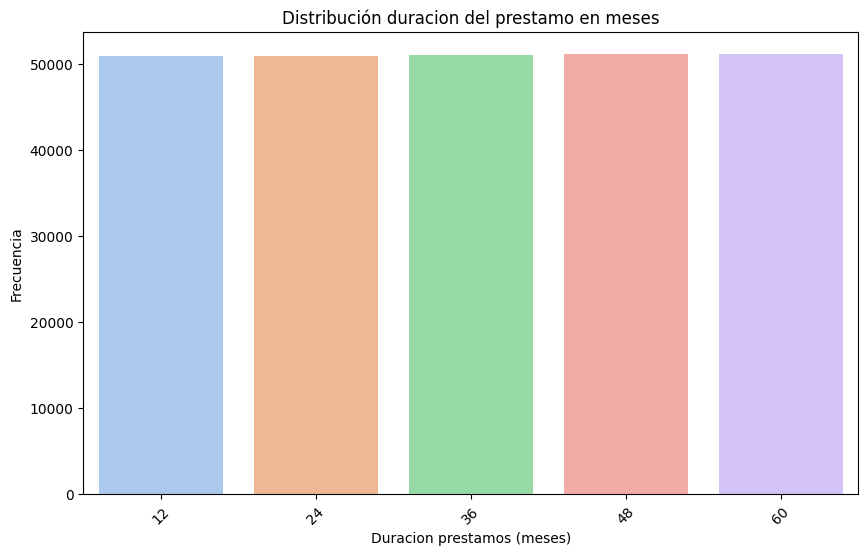

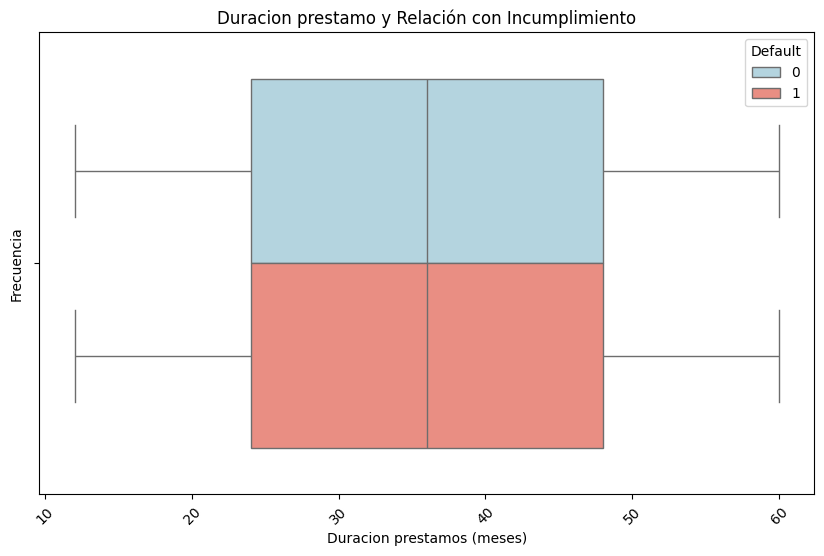

In [48]:
#  Duración del préstamo en meses 
Loan_Term = df['LoanTerm'].value_counts()
print(Loan_Term.sort_index())

# Gráfico de barras de 'LoanTerm'
plt.figure(figsize=(10, 6))
sns.countplot(x='LoanTerm', data=df, hue='LoanTerm', palette='pastel', legend=False)
plt.title('Distribución duracion del prestamo en meses')
plt.xlabel('Duracion prestamos (meses)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para 'LoanTerm' vs 'Default'
plt.figure(figsize=(10, 6))
sns.boxplot(x='LoanTerm', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Duracion prestamo y Relación con Incumplimiento')
plt.xlabel('Duracion prestamos (meses)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64


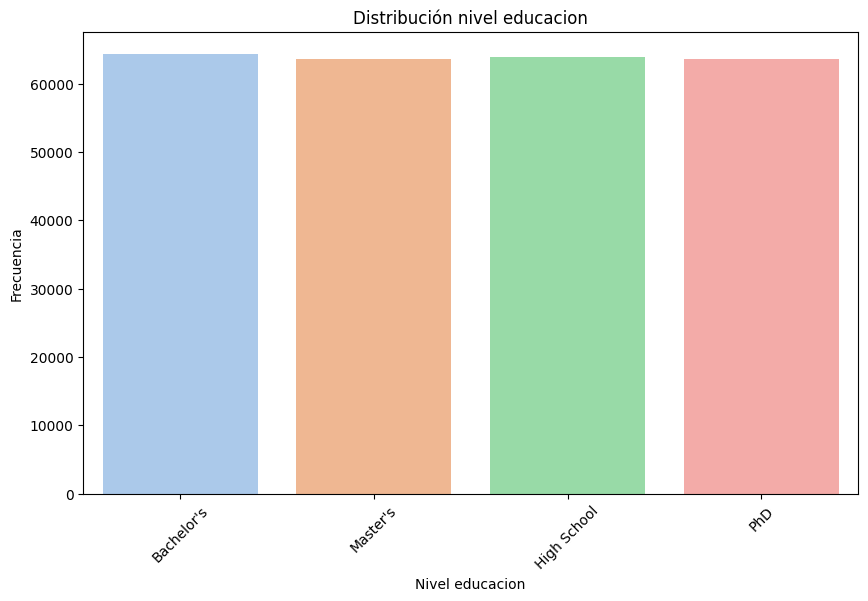

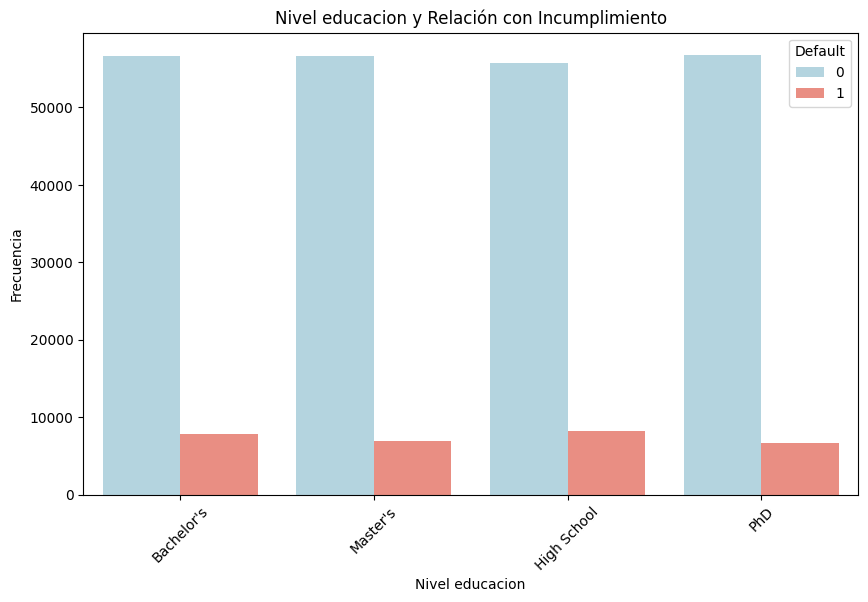

In [49]:
# nivel educativo 
Education = df['Education'].value_counts()
print(Education.sort_index())

# Gráfico de barras de 'MonthsEmployed'
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df, hue='Education', palette='pastel', legend=False)
plt.title('Distribución nivel educacion')
plt.xlabel('Nivel educacion')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para 'Education' vs 'Default'
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Nivel educacion y Relación con Incumplimiento')
plt.xlabel('Nivel educacion')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

HasMortgage
No     127670
Yes    127677
Name: count, dtype: int64


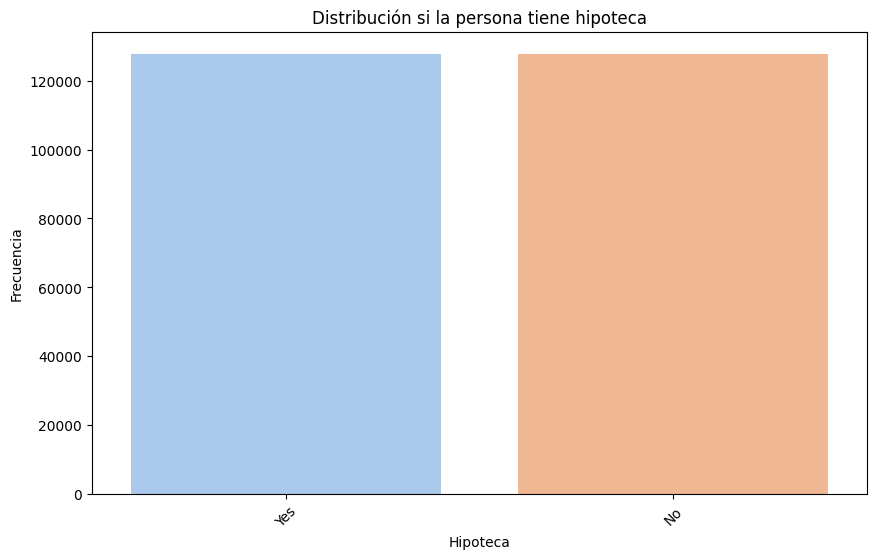

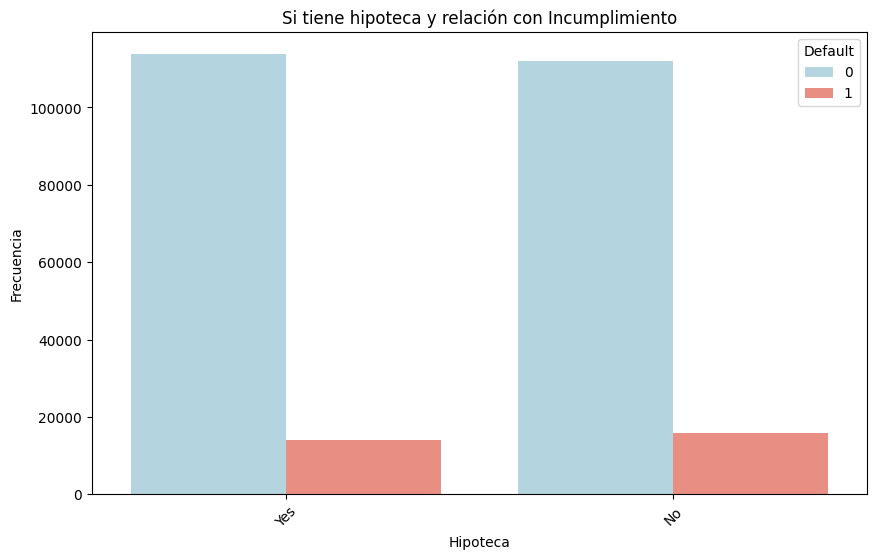

In [52]:
# si la persona tiene una hipoteca 
Has_Mortgage = df['HasMortgage'].value_counts()
print(Has_Mortgage.sort_index())

# Gráfico de barras de 'HasMortgage'
plt.figure(figsize=(10, 6))
sns.countplot(x='HasMortgage', data=df, hue='HasMortgage', palette='pastel', legend=False)
plt.title('Distribución si la persona tiene hipoteca')
plt.xlabel('Hipoteca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para 'HasMortgage' vs 'Default'
plt.figure(figsize=(10, 6))
sns.countplot(x='HasMortgage', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Si tiene hipoteca y relación con Incumplimiento')
plt.xlabel('Hipoteca')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

HasCoSigner
No     127646
Yes    127701
Name: count, dtype: int64


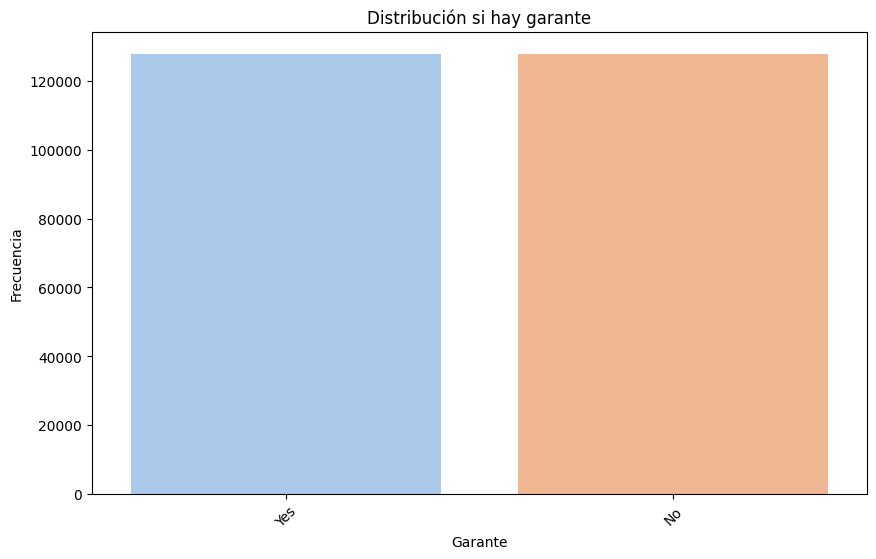

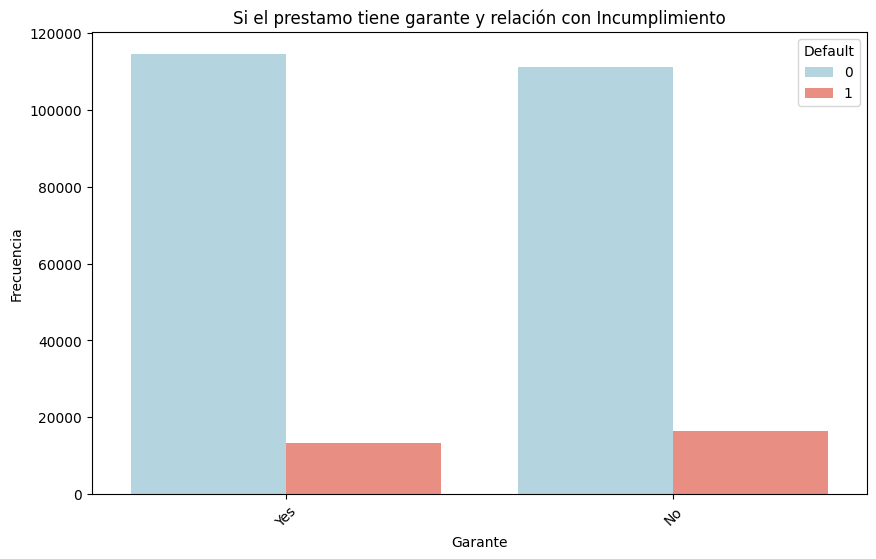

In [51]:
# si el préstamo tiene un garante 
Has_CoSigner = df['HasCoSigner'].value_counts()
print(Has_CoSigner.sort_index())

# Gráfico de barras de 'HasCoSigner'
plt.figure(figsize=(10, 6))
sns.countplot(x='HasCoSigner', data=df, hue='HasCoSigner', palette='pastel', legend=False)
plt.title('Distribución si hay garante')
plt.xlabel('Garante')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para 'HasCoSigner' vs 'Default'
plt.figure(figsize=(10, 6))
sns.countplot(x='HasCoSigner', hue='Default', data=df, palette=['lightblue', 'salmon'])
plt.title('Si el prestamo tiene garante y relación con Incumplimiento')
plt.xlabel('Garante')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# 3. Detección de valores nulos y extremos

In [5]:
# Revisar valores nulos
print(df.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


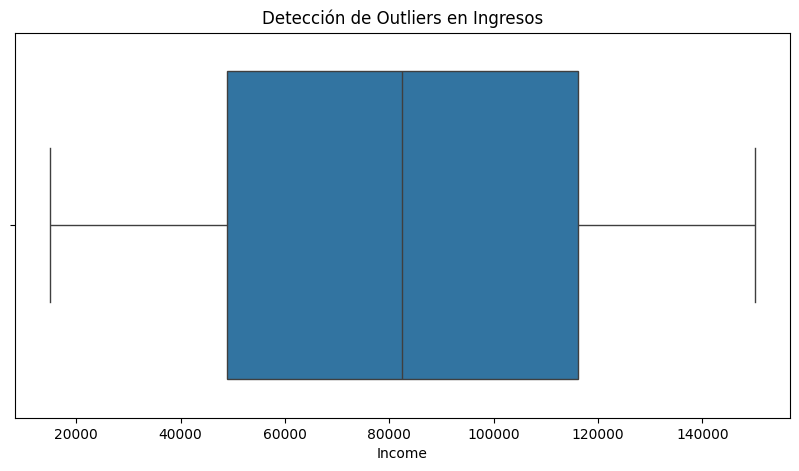

In [6]:
# Identificación de outliers en 'Income'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Income'])
plt.title('Detección de Outliers en Ingresos')
plt.show()

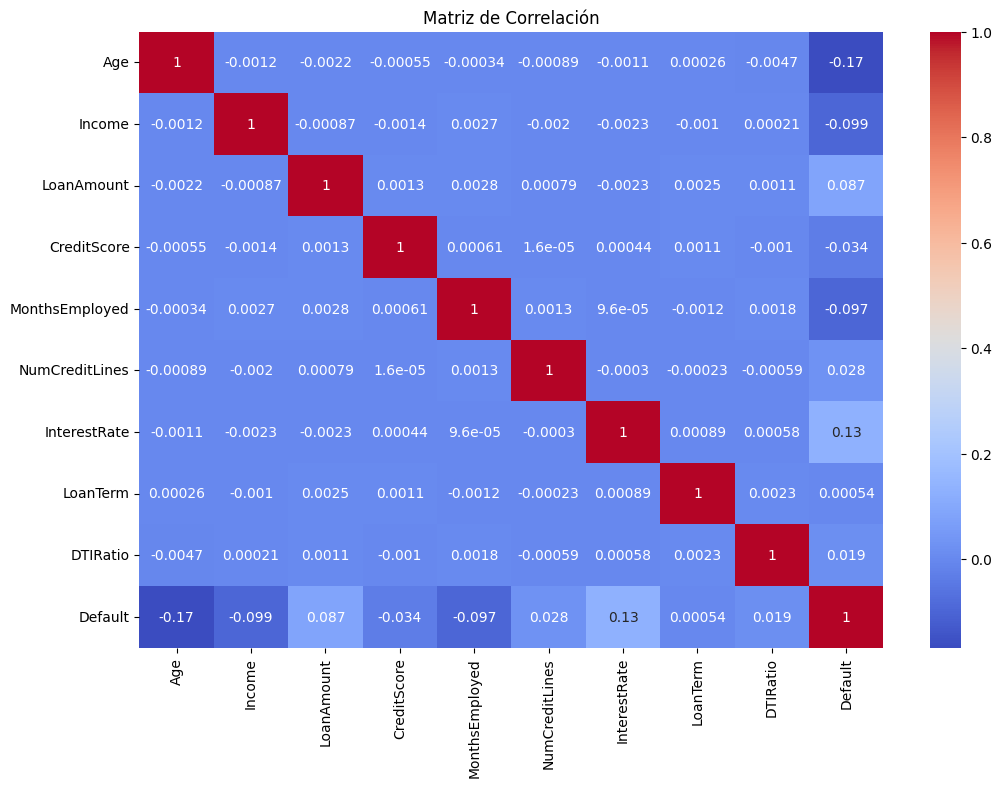

In [10]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Matriz de correlación
corr_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [33]:
# Estadísticas descriptivas de 'Income'
print(df['Income'].describe())

# Estadísticas descriptivas de 'CreditScore'
print(df['CreditScore'].describe())


count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64
count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64
